In [224]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import random

In [225]:
# Hàm tạo tên người Việt ngẫu nhiên
def generate_vietnamese_name():
    last_names = ['Nguyễn', 'Trần', 'Lê', 'Phạm', 'Hoàng', 'Huỳnh', 'Phan', 'Vũ', 'Đặng', 'Bùi', 'Đỗ', 'Hồ', 'Ngô', 'Dương', 'Lý']
    middle_names = ['Văn', 'Hữu', 'Quốc', 'Thị', 'Đình', 'Thái', 'Minh', 'Thu', 'Nhật', 'Xuân', 'Hoàng', 'Thanh', 'Trung', 'Phương', 'Hải']
    first_names = ['An', 'Bình', 'Chi', 'Dũng', 'Dung', 'Hạnh', 'Hoa', 'Huy', 'Hương', 'Khánh', 'Lan', 'Long', 'Minh', 'Nam', 'Nga', 'Quân', 'Sơn', 'Tùng', 'Tú', 'Yến']
    
    last_name = random.choice(last_names)
    middle_name = random.choice(middle_names)
    first_name = random.choice(first_names)
    
    return f"{last_name} {middle_name} {first_name}"

# Tạo 2000 bản ghi sinh viên với điểm số nguyên từ 0 đến 10
data = {
    "Họ và tên": [generate_vietnamese_name() for _ in range(2000)],
    "Điểm 1": [random.randint(0, 10) for _ in range(2000)],
    "Điểm 2": [random.randint(0, 10) for _ in range(2000)],
    "Điểm 3": [random.randint(0, 10) for _ in range(2000)],
    "Điểm thi": [random.randint(0, 10) for _ in range(2000)]
}

# Tạo DataFrame
df = pd.DataFrame(data)

# Lưu dữ liệu vào file CSV
df

,Họ và tên,Điểm 1,Điểm 2,Điểm 3,Điểm thi
0,Dương Văn Dũng,6,1,2,9
1,Lý Trung Tú,1,5,5,10
2,Dương Xuân Bình,5,2,7,1
3,Lý Minh Hương,7,8,1,7
4,Vũ Phương An,2,5,9,5
...,...,...,...,...,...
1995,Trần Thị Long,2,0,7,2
1996,Bùi Thị Hạnh,9,3,8,8
1997,Bùi Thanh Bình,9,10,7,9
1998,Lý Thu Hoa,7,7,4,9


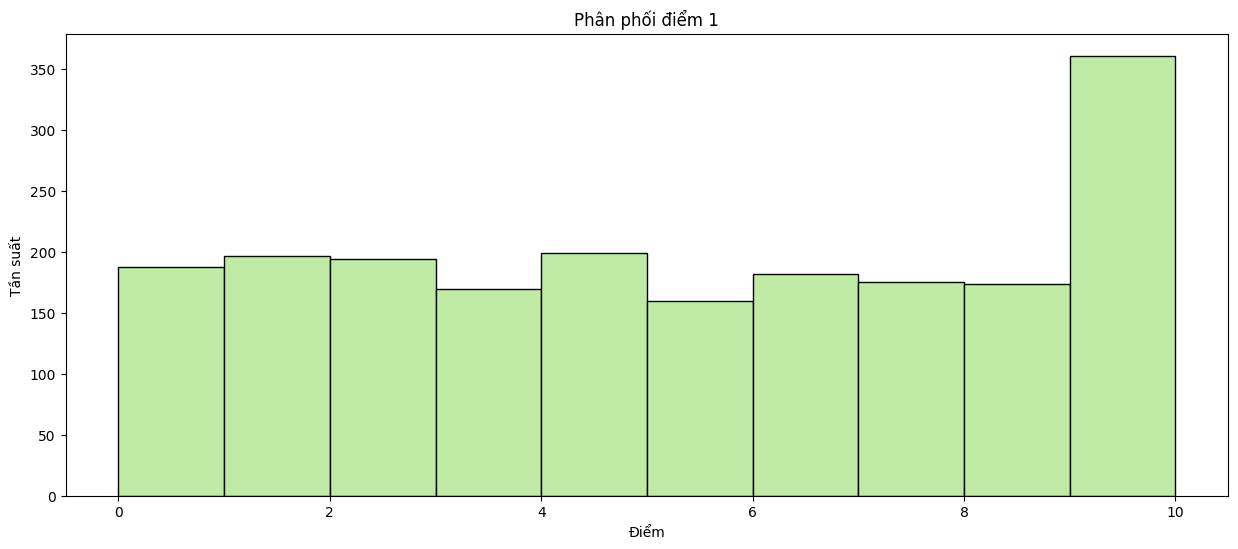

In [226]:
plt.figure(figsize=(15,6))
plt.hist(df["Điểm 1"], bins=10, color='#C0EBA6', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối điểm 1')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

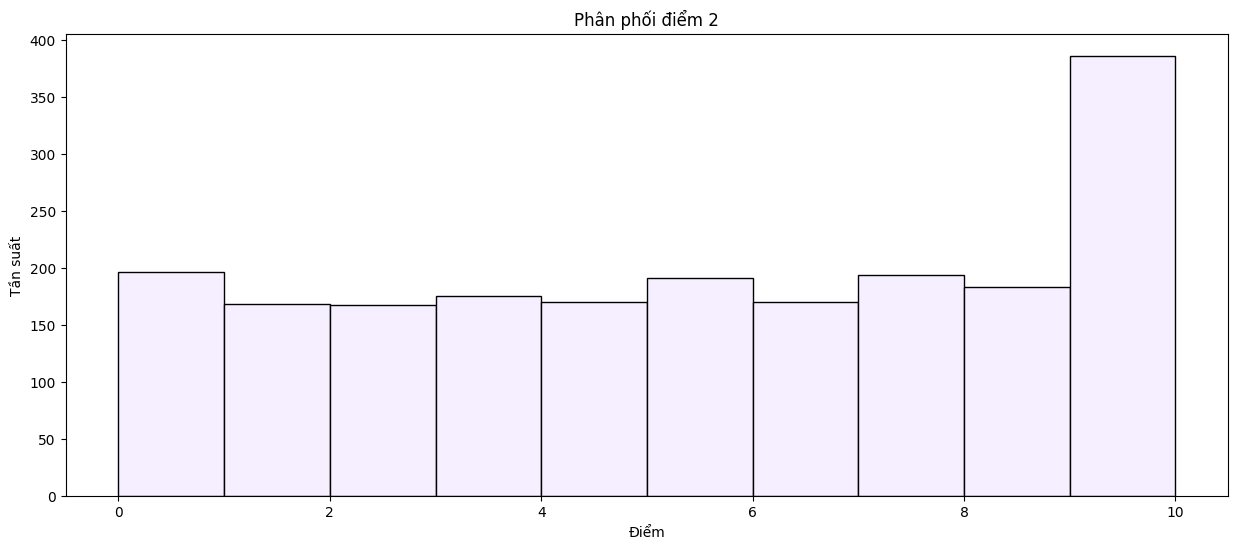

In [227]:
plt.figure(figsize=(15,6))
plt.hist(df["Điểm 2"], bins=10, color='#F5EFFF', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối điểm 2')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

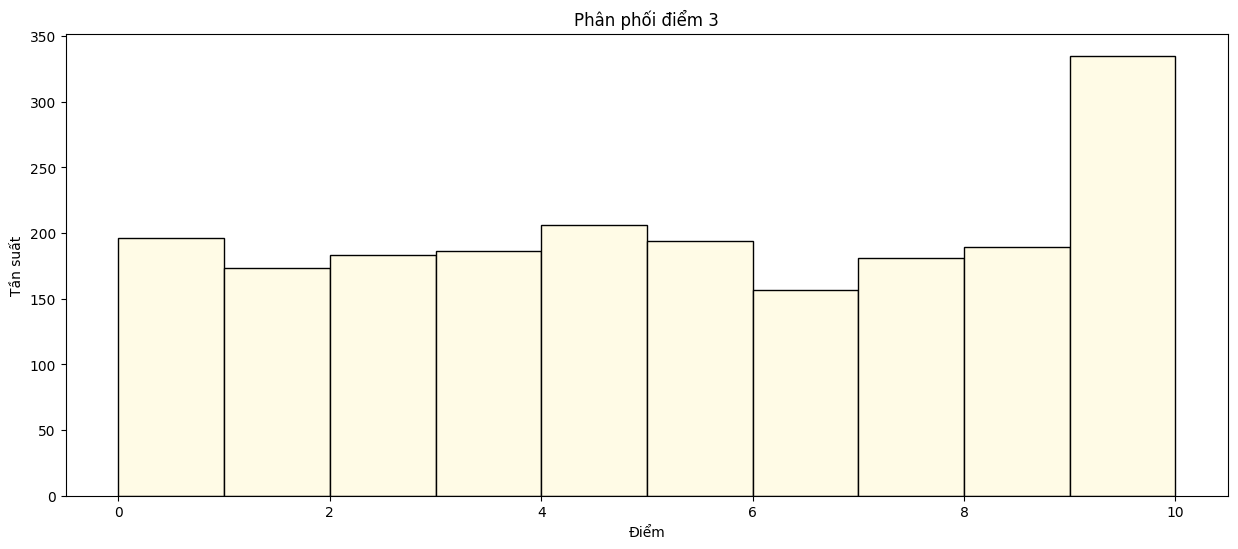

In [228]:
plt.figure(figsize=(15,6))
plt.hist(df["Điểm 3"], bins=10, color='#FFFBE6', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối điểm 3')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

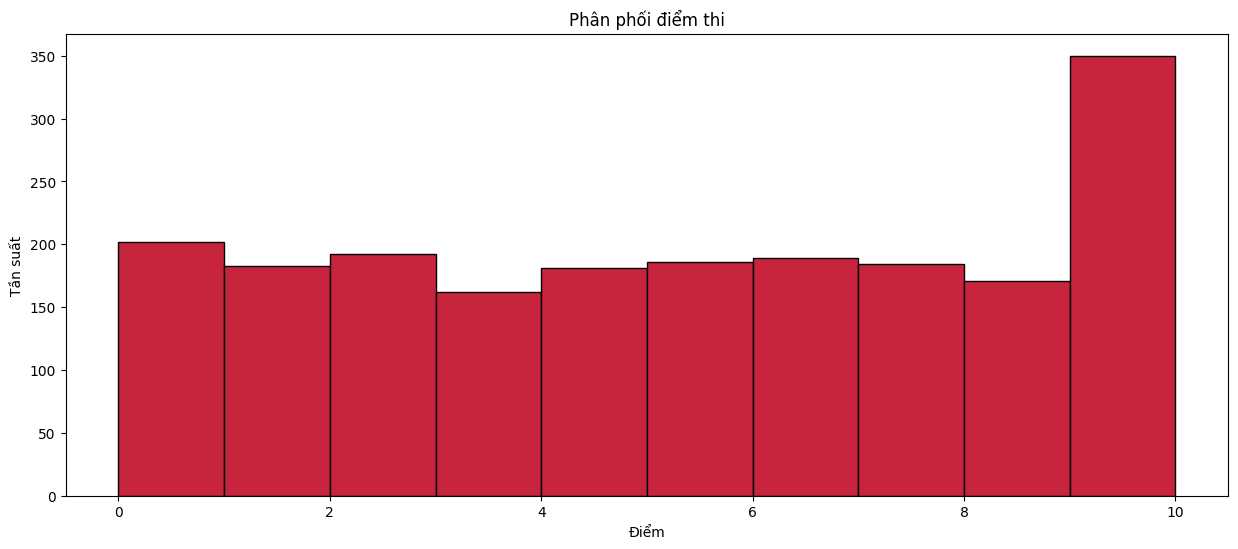

In [229]:
plt.figure(figsize=(15,6))
plt.hist(df["Điểm thi"], bins=10, color='#C7253E', edgecolor='black')

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối điểm thi')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

In [230]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [231]:
X = df.drop(columns=["Họ và tên", "Điểm thi"])
y = df["Điểm thi"]

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [233]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_pred, y_test))

MSE: 9.481253723080933


In [234]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [235]:
with open("./model.pkl", "rb") as f:
    model = pickle.load(f)
weight_predict = model.predict([[10, 10, 10]])
weight_predict[0]

C:\Users\xin chao\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4.860544737036785

In [236]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [237]:
class CNNModel(tf.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = tf.Variable(tf.random.normal([1, 1, 1, 32]), name='conv1_weights', dtype=tf.float32)  # Lớp Conv2D với 32 filters
        self.dense1 = tf.Variable(tf.random.normal([96, 48]), name='dense1_weights', dtype=tf.float32)  # Fully connected layer 1
        self.dense2 = tf.Variable(tf.random.normal([48, 1]), name='dense2_weights', dtype=tf.float32)   # Fully connected layer 2

    def __call__(self, x):
        x = tf.reshape(x, [-1, 3, 1, 1])  # Reshape input thành [batch_size, height=2, width=1, channels=1]
        conv = tf.nn.conv2d(x, self.conv1, strides=[1, 1, 1, 1], padding="VALID")
        conv = tf.nn.relu(conv)  # Activation ReLU
        conv_flat = tf.reshape(conv, [-1, 96])  # Flatten
        dense1_out = tf.matmul(conv_flat, self.dense1)
        dense1_out = tf.nn.relu(dense1_out)  # Activation ReLU
        output = tf.matmul(dense1_out, self.dense2)  # Output layer
        return output
    
# Khởi tạo mô hình
model = CNNModel()

# Hàm mất mát (loss function)
loss_fn = tf.losses.MeanSquaredError()

# Optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.001)

# Hàm huấn luyện một batch
@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        predictions = model(X)
        loss = loss_fn(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

X_train_dl = X_train.astype(np.float32)
y_train_dl = y_train.astype(np.float32)
X_test_dl = X_test.astype(np.float32)
y_test_dl = y_test.astype(np.float32)
# Store loss values
loss_values = []

# Huấn luyện mô hình
epochs = 1000
batch_size = 32
for epoch in range(epochs):
    epoch_loss = 0
    for i in range(0, len(X_train_dl), batch_size):
        X_batch = X_train_dl[i:i+batch_size]
        y_batch = y_train_dl[i:i+batch_size]
        loss = train_step(X_batch, y_batch)
        epoch_loss += loss.numpy()
    loss_values.append(epoch_loss / (len(X_train_dl) // batch_size))
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / (len(X_train_dl) // batch_size)}')

Epoch 1/1000, Loss: 2865.4155651855467
Epoch 2/1000, Loss: 689.6739782714844
Epoch 3/1000, Loss: 308.57927856445315
Epoch 4/1000, Loss: 186.3863510131836
Epoch 5/1000, Loss: 138.35174133300782
Epoch 6/1000, Loss: 108.23838401794434
Epoch 7/1000, Loss: 85.90770286560058
Epoch 8/1000, Loss: 70.20004570007325
Epoch 9/1000, Loss: 59.38180732727051
Epoch 10/1000, Loss: 51.11054313659668
Epoch 11/1000, Loss: 44.32291717529297
Epoch 12/1000, Loss: 38.8370246887207
Epoch 13/1000, Loss: 34.43102270126343
Epoch 14/1000, Loss: 30.832357711791992
Epoch 15/1000, Loss: 27.815490341186525
Epoch 16/1000, Loss: 25.361356773376464
Epoch 17/1000, Loss: 23.27725929260254
Epoch 18/1000, Loss: 21.536832885742186
Epoch 19/1000, Loss: 20.11267448425293
Epoch 20/1000, Loss: 18.94305639266968
Epoch 21/1000, Loss: 17.97783941268921
Epoch 22/1000, Loss: 17.175410165786744
Epoch 23/1000, Loss: 16.52096173286438
Epoch 24/1000, Loss: 15.98890935897827
Epoch 25/1000, Loss: 15.543328313827514
Epoch 26/1000, Loss: 15.1

In [238]:
test_loss = loss_fn(y_test_dl, model(X_test_dl)).numpy()

In [239]:
# Save mô hình
conv1_weights_np = model.conv1.numpy()
np.save('conv1_weights.npy', conv1_weights_np)

dense1_weights_np = model.dense1.numpy()
np.save('dense1_weights.npy', dense1_weights_np)

dense2_weights_np = model.dense2.numpy()
np.save('dense2_weights.npy', dense2_weights_np)

In [260]:
class SimpleRNN:
    def __init__(self, input_size, hidden_size):
        self.hidden_size = hidden_size
        self.Wxh = tf.Variable(tf.random.normal([input_size, hidden_size]), name='Wxh')
        self.Whh = tf.Variable(tf.random.normal([hidden_size, hidden_size]), name='Whh')
        self.bh = tf.Variable(tf.zeros([hidden_size]), name='bh')
        self.Why = tf.Variable(tf.random.normal([hidden_size, 1]), name='Why')
        self.by = tf.Variable(tf.zeros([1]), name='by')

    def step(self, x, h):
        h = tf.tanh(tf.matmul(x, self.Wxh) + tf.matmul(h, self.Whh) + self.bh)
        y = tf.matmul(h, self.Why) + self.by
        return y, h

    def forward(self, x):
        h = tf.zeros([x.shape[0], self.hidden_size])  # Initialize hidden state
        for t in range(x.shape[1]):  # Loop over time steps
            y, h = self.step(x[:, t, :], h)
        return y

    @property
    def trainable_variables(self):
        return [self.Wxh, self.Whh, self.bh, self.Why, self.by]

# Instantiate model
model = SimpleRNN(input_size=3, hidden_size=64)

# Instantiate optimizer
optimizer = tf.optimizers.Adam()

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        predictions = model.forward(x)
        loss = loss_fn(y, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

X_train_dl = X_train.astype(np.float32).reshape(-1, 1, 3)

epochs = 1000
batch_size = 32
for epoch in range(epochs):
    for i in range(0, len(X_train_dl), batch_size):
        X_batch = X_train_dl[i:i + batch_size]
        y_batch = y_train_dl[i:i + batch_size]
        loss = train_step(X_batch, y_batch)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}')


Epoch 1/1000, Loss: 22.383930206298828
Epoch 2/1000, Loss: 17.6368408203125
Epoch 3/1000, Loss: 15.249656677246094
Epoch 4/1000, Loss: 13.879404067993164
Epoch 5/1000, Loss: 12.974658012390137
Epoch 6/1000, Loss: 12.310876846313477
Epoch 7/1000, Loss: 11.788406372070312
Epoch 8/1000, Loss: 11.370768547058105
Epoch 9/1000, Loss: 11.043967247009277
Epoch 10/1000, Loss: 10.795108795166016
Epoch 11/1000, Loss: 10.608110427856445
Epoch 12/1000, Loss: 10.46678352355957
Epoch 13/1000, Loss: 10.357444763183594
Epoch 14/1000, Loss: 10.269660949707031
Epoch 15/1000, Loss: 10.196142196655273
Epoch 16/1000, Loss: 10.131982803344727
Epoch 17/1000, Loss: 10.073603630065918
Epoch 18/1000, Loss: 10.019123077392578
Epoch 19/1000, Loss: 9.969778060913086
Epoch 20/1000, Loss: 9.929145812988281
Epoch 21/1000, Loss: 9.899798393249512
Epoch 22/1000, Loss: 9.88123607635498
Epoch 23/1000, Loss: 9.870925903320312
Epoch 24/1000, Loss: 9.866039276123047
Epoch 25/1000, Loss: 9.864259719848633
Epoch 26/1000, Loss:

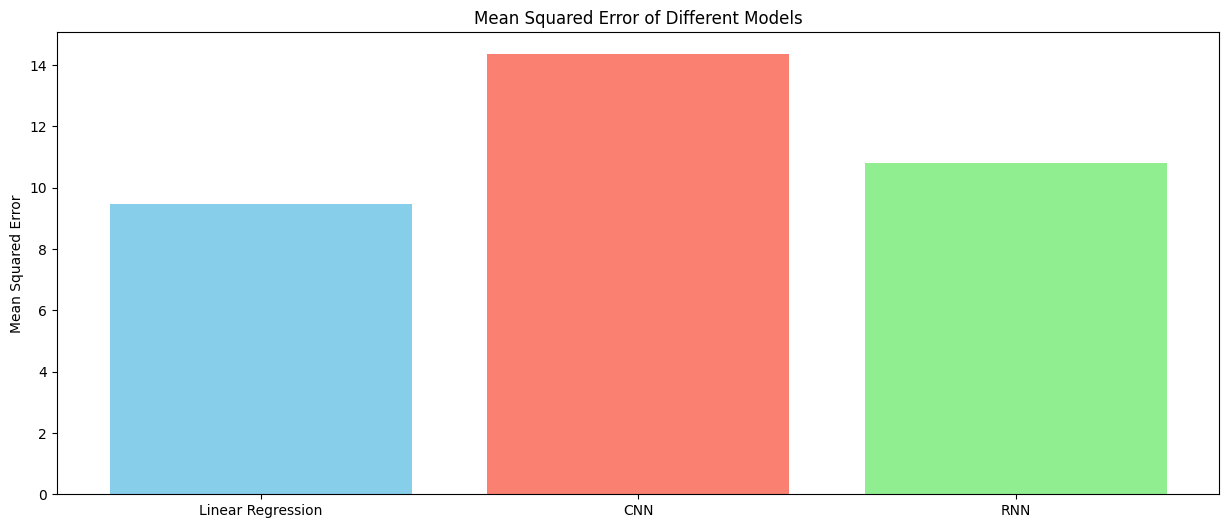

In [241]:
# MSE values
mse_linear = mean_squared_error(y_pred, y_test)
mse_cnn =test_loss
mse_rnn = mean_squared_error(model.forward(X_test_dl.reshape(-1, 1, 3)), y_test_dl)

# Plotting the MSE comparison
plt.figure(figsize=(15, 6))
plt.bar(['Linear Regression', 'CNN', 'RNN'], [mse_linear, mse_cnn, mse_rnn], color=['skyblue', 'salmon', 'lightgreen'])
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Different Models')
plt.show()

In [266]:
for v in model.trainable_variables:
    weight = v.numpy()
    np.save( f'{v.name[:-2]}.npy', weight)
    print(type(v.name[:-2]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [249]:
class SimpleRNN:
    def __init__(self, input_size, hidden_size):
        self.hidden_size = hidden_size
        self.Wxh = tf.Variable(tf.random.normal([input_size, hidden_size]), name='Wxh')
        self.Whh = tf.Variable(tf.random.normal([hidden_size, hidden_size]), name='Whh')
        self.bh = tf.Variable(tf.zeros([hidden_size]), name='bh')
        self.Why = tf.Variable(tf.random.normal([hidden_size, 1]), name='Why')
        self.by = tf.Variable(tf.zeros([1]), name='by')

    def step(self, x, h):
        print(x.shape, h.shape, self.Wxh.shape, self.Whh.shape)
        print(x.shape, h.shape, tf.matmul(x, self.Wxh), tf.matmul(h, self.Whh), self.bh)
        h = tf.tanh(tf.matmul(x, self.Wxh) + tf.matmul(h, self.Whh) + self.bh)
        y = tf.matmul(h, self.Why) + self.by
        return y, h

    def forward(self, x):
        h = tf.zeros([x.shape[0], self.hidden_size])  # Initialize hidden state
        # print(h.shape)
        for t in range(x.shape[1]):  # Loop over time steps
            y, h = self.step(x[:, t, :], h)
        return y

    @property
    def trainable_variables(self):
        return [self.Wxh, self.Whh, self.bh, self.Why, self.by]

In [267]:
model = SimpleRNN(input_size=3, hidden_size=64)

# Load weights
model.Wxh = tf.Variable(np.load('./rnn/Wxh.npy'))
model.Whh = tf.Variable(np.load('./rnn/Whh.npy'))
model.bh = tf.Variable(np.load('./rnn/bh.npy'))
model.Why = tf.Variable(np.load('./rnn/Why.npy'))
model.by = tf.Variable(np.load('./rnn/by.npy'))

# Predict
weight_predict = model.forward(np.array([2,10,10]).astype(np.float32).reshape(-1,1,3))
weight_predict[0][0].numpy()

6.833038